In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import skimage
import sklearn

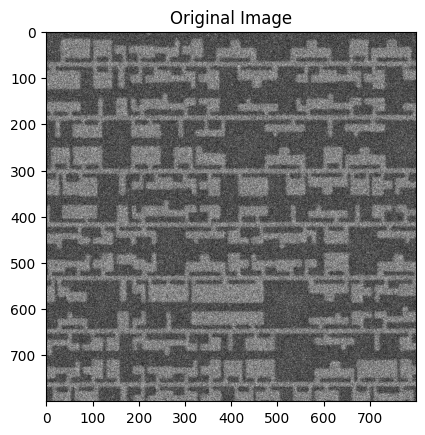

Type <class 'numpy.ndarray'> uint8
Shape (800, 800)
Range 0 - 255


In [2]:
# load and show original image

def imshow(img:np.ndarray, title:str):
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()
    # print image statistics
    print('Type', type(img), img.dtype)
    print('Shape', img.shape)
    print('Range', np.min(img), '-', np.max(img))

original_image = skimage.io.imread('img_0.png')
imshow(original_image, 'Original Image')

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


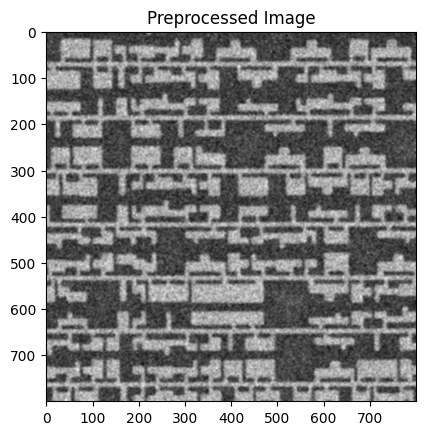

Type <class 'numpy.ndarray'> uint8
Shape (800, 800)
Range 46 - 170


In [3]:
# preprocessing - mean filtering 
# input: original_image, out: preprocessed_image
kernel = np.ones([5,5])
print(kernel)
preprocessed_image = skimage.filters.rank.mean(original_image, kernel)
imshow(preprocessed_image, 'Preprocessed Image')

103


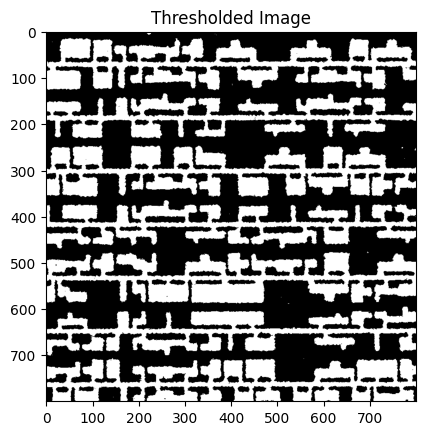

Type <class 'numpy.ndarray'> bool
Shape (800, 800)
Range False - True


In [4]:
# basic segmentation - otsu thresholding
thresh = skimage.filters.threshold_otsu(preprocessed_image)
print(thresh)
thresholded_image = preprocessed_image > thresh
imshow(thresholded_image, 'Thresholded Image')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


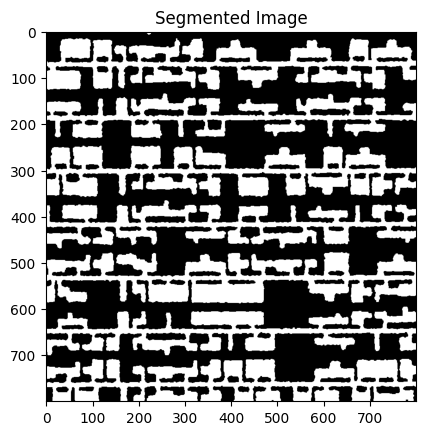

Type <class 'numpy.ndarray'> bool
Shape (800, 800)
Range False - True


In [5]:
# postprocessing - morphological operations 
# input: thresholded_image, out: segmentation
structuring_element = np.ones([3,3])
print(structuring_element)
postprocess_image = skimage.morphology.binary_opening(thresholded_image, structuring_element)
segmentation = skimage.morphology.binary_closing(postprocess_image, structuring_element)
imshow(segmentation, 'Segmented Image')

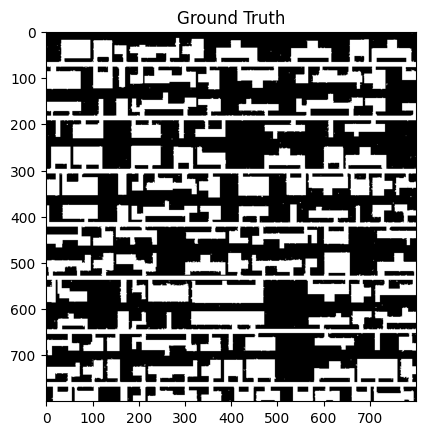

Type <class 'numpy.ndarray'> bool
Shape (800, 800)
Range False - True


In [6]:
# load and show ground truth
ground_truth = skimage.io.imread('gt_0.png').astype('bool')
imshow(ground_truth, 'Ground Truth')

In [7]:
# evaluation - IoU
import sklearn.metrics
iou = sklearn.metrics.jaccard_score(segmentation.flatten(),
                                   ground_truth.flatten())
print('Iou', iou)

Iou 0.8847514256545637


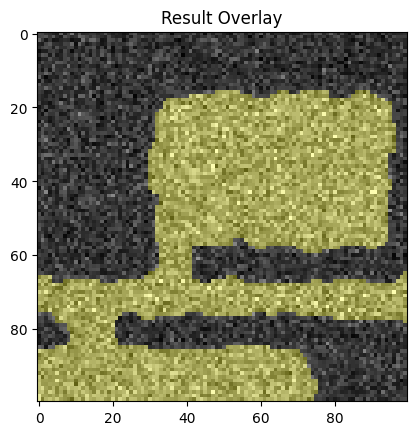

Type <class 'numpy.ndarray'> float64
Shape (100, 100, 3)
Range 0.002745098039215686 - 1.0


In [8]:
# visualize results
visualization = skimage.color.label2rgb(segmentation,
                                       original_image,
                                       ['yellow'])
imshow(visualization[0:100, 0:100], 'Result Overlay')